# Sleep data exploration 

In [3]:
import pandas as pd 
import numpy as np 

sleep = pd.read_csv("Sleep_Analysis.csv")
print(sleep.head(n=5))
sleep.isnull().sum() #No missing values

print(sleep['Age'].mean())
print(sleep['Gender'].value_counts())

   Age  Gender meals/day physical illness  screen time bluelight filter  \
0   22    Male       two               no         2hrs              yes   
1   22  Female     three               no      3-4 hrs               no   
2   23    Male     three               no      3-4 hrs               no   
3   23  Female       two               no      1-2 hrs               no   
4   22    Male     three               no  more than 5              yes   

  sleep direction   exercise smoke/drink             beverage  sleep time  
0            west  sometimes          no                  Tea      6.7575  
1           south         no          no               Coffee      8.0000  
2           south         no          no                  Tea      8.0000  
3            east  sometimes          no               Coffee      6.5000  
4            east  sometimes         yes  Tea and Coffee both      6.0000  
24.76086956521739
Male                 26
Female               18
Prefer not to say     2
Nam

## Transforming some of the variables to improve class balance

In [5]:
#transforming meals per day variable into two categories considering 4 of the classes have little samples
# New classes are 1-2 meals a day and 3 or more meals a day
#print(sleep['meals/day'].value_counts())

sleep['meals_trans'] = sleep['meals/day'].str.replace("one", "1-2 meals per day").str.replace("two", "1-2 meals per day")\
.str.replace("three", "3 or more meals per day").str.replace("four", "3 or more meals per day").str.replace\
("five", "3 or more meals per day" ).str.replace("more than 5", "3 or more meals per day")

print(sleep['meals/day'].value_counts())
print(sleep['meals_trans'].value_counts())

three          22
two            16
one             3
four            3
five            1
more than 5     1
Name: meals/day, dtype: int64
3 or more meals per day    27
1-2 meals per day          19
Name: meals_trans, dtype: int64


In [3]:
print(sleep['physical illness'].value_counts()) #not enough samples in yes class to use feature

no     42
yes     4
Name: physical illness, dtype: int64


In [4]:
print(sleep['screen time'].value_counts())

#transforming variable into two classes: 3 or more hours of screen time and 0-3 hours of screen time

sleep['screentime_trans'] = sleep['screen time'].replace("more than 5", "3 or more hours").replace("2-3 hrs", "0-3 hours")\
.replace("3-4 hrs", "3 or more hours").replace("4-5 hrs", "3 or more hours"). replace("1-2 hrs", "0-3 hours")\
.replace("0-1 hrs", "0-3 hours").replace("2hrs", "0-3 hours")

print(sleep['screentime_trans'].value_counts())

more than 5    16
2-3 hrs         8
3-4 hrs         7
4-5 hrs         6
1-2 hrs         6
0-1 hrs         2
2hrs            1
Name: screen time, dtype: int64
3 or more hours    29
0-3 hours          17
Name: screentime_trans, dtype: int64


In [5]:
print(sleep['bluelight filter'].value_counts()) #good balance and two class

yes    25
no     21
Name: bluelight filter, dtype: int64


In [6]:
print(sleep['sleep direction'].value_counts())

west     16
east     15
north     9
south     6
Name: sleep direction, dtype: int64


In [7]:
print(sleep['exercise'].value_counts()) #use

sometimes    23
yes          12
no           11
Name: exercise, dtype: int64


In [8]:
print(sleep['smoke/drink'].value_counts()) #don't include as there is barely any samples that say yes

no     42
yes     4
Name: smoke/drink, dtype: int64


In [9]:
print(sleep['beverage'].value_counts()) #will convert coffee and tea, and coffee into a new class "Coffee". Considering coffee
# has more caffeine than tea. this also balances samples out more better

sleep['Beverage_trans'] = sleep['beverage'].replace("Tea and Coffee both", "Coffee")
sleep['Beverage_trans'].value_counts()

Tea                    22
none of the above      10
Tea and Coffee both     8
Coffee                  6
Name: beverage, dtype: int64


Tea                  22
Coffee               14
none of the above    10
Name: Beverage_trans, dtype: int64

## Transforming the dependent variabe (Amount of hours slept)

In [15]:
print(sleep['sleep time'].value_counts()) 

#As can be seen, majority of samples fall within 7-8 hours sleep
# a binary classification problem can be formed by 1 class consisting of 7 or more hours sleep (29 samples)
# and less than 7 hours slept (17). This greatly improves class balance and allows classification algorithms to be used which
#may be better suited. In addition, the variable is continuous in nature but has been discretised so it is a discrete variable.

sleep['sleeptime_trans'] = sleep['sleep time'].replace(7.0000, "7 or more hours slept").replace(8.0000, "7 or more hours slept")\
.replace(6.0000, "less than 7 hours slept").replace(6.5000, "less than 7 hours slept").replace(6.7575, "less than 7 hours slept")\
.replace(5.0000, "less than 7 hours slept").replace(3.3300, "less than 7 hours slept").replace(4.0000, "less than 7 hours slept")\
.replace(9.0000, "7 or more hours slept").replace(1.5000, "less than 7 hours slept")

sleep['sleeptime_trans'].value_counts()

7.0000    16
8.0000    12
6.0000     7
6.5000     3
6.7575     2
5.0000     2
3.3300     1
4.0000     1
9.0000     1
1.5000     1
Name: sleep time, dtype: int64


7 or more hours slept      29
less than 7 hours slept    17
Name: sleeptime_trans, dtype: int64

## Visualising some of the features on the DV

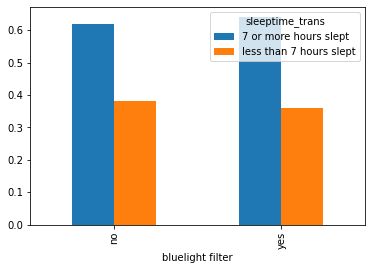

In [25]:
#Bluelight filter 

import matplotlib.pyplot as plt

bluelight = sleep.groupby("bluelight filter").sleeptime_trans.value_counts(normalize = True)
bluelight = bluelight.unstack()
bluelight.plot(kind = 'bar')

#Blue light filter doesn't appear to make much of a difference on hours slept when eye balling the graph.



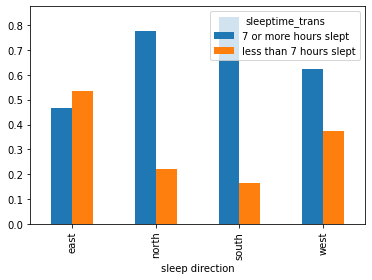

In [26]:
#sleep direction 

sleep_direction = sleep.groupby("sleep direction").sleeptime_trans.value_counts(normalize= True)
sleep_direction = sleep_direction.unstack()
sleep_direction.plot(kind = 'bar')

#Sleeping in north or south direction tends to result in more sleep.
#Sleep in east direction resulted in the least amount of sleep. 

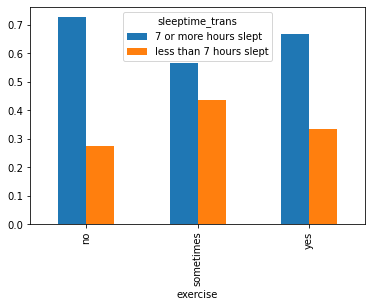

In [27]:
#exercise 

exercise = sleep.groupby("exercise").sleeptime_trans.value_counts(normalize = True)
exercise = exercise.unstack()
exercise.plot(kind = 'bar')

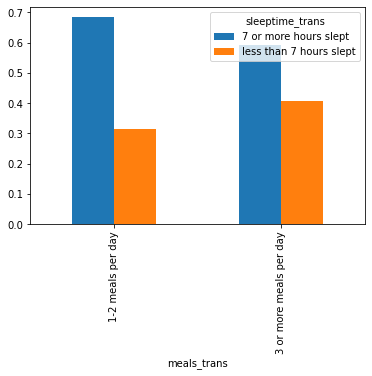

In [29]:
#meals 

meals = sleep.groupby("meals_trans").sleeptime_trans.value_counts(normalize = True)
meals = meals.unstack()
meals.plot(kind = 'bar')

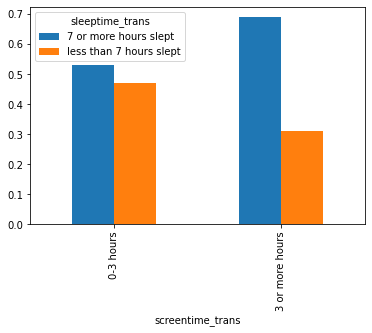

In [31]:
#Screen time

screen = sleep.groupby("screentime_trans").sleeptime_trans.value_counts(normalize = True)
screen = screen.unstack()
screen.plot(kind = 'bar')

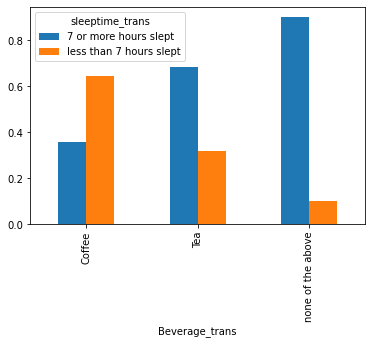

In [32]:
#beverage 

bev = sleep.groupby("Beverage_trans").sleeptime_trans.value_counts(normalize = True)
bev = bev.unstack()
bev.plot(kind = 'bar')

#As can be seen from the graph, people who drink coffee before bed time tend to get the least amount of sleep.
#People who don't drink coffee or tea before bed tend to sleep the most. Makes sense since caffeine can interfere with sleep

## Creating new dataframe 

In [33]:
sleep_new = sleep.drop(["Age", "Gender", "meals/day", "physical illness", "screen time", "smoke/drink", "sleep time", 'beverage'], axis = 1)
sleep_new.head(n=5)

,bluelight filter,sleep direction,exercise,meals_trans,screentime_trans,Beverage_trans,sleeptime_trans
0,yes,west,sometimes,1-2 meals per day,0-3 hours,Tea,less than 7 hours slept
1,no,south,no,3 or more meals per day,3 or more hours,Coffee,7 or more hours slept
2,no,south,no,3 or more meals per day,3 or more hours,Tea,7 or more hours slept
3,no,east,sometimes,1-2 meals per day,0-3 hours,Coffee,less than 7 hours slept
4,yes,east,sometimes,3 or more meals per day,3 or more hours,Coffee,less than 7 hours slept


In [34]:
X = sleep_new.drop(['sleeptime_trans'], axis = 1)
print(X.head(n=1))

y = sleep_new['sleeptime_trans']
y.head(n=1)

  bluelight filter sleep direction   exercise        meals_trans  \
0              yes            west  sometimes  1-2 meals per day   

  screentime_trans Beverage_trans  
0        0-3 hours            Tea  


0    less than 7 hours slept
Name: sleeptime_trans, dtype: object

## Converting all features to dummy variables 

In [35]:
for i in X.columns:
    X = pd.get_dummies(X, prefix=[i], columns = [i], drop_first = True)
X.head(1)

,bluelight filter_yes,sleep direction_north,sleep direction_south,sleep direction_west,exercise_sometimes,exercise_yes,meals_trans_3 or more meals per day,screentime_trans_3 or more hours,Beverage_trans_Tea,Beverage_trans_none of the above
0,1,0,0,1,1,0,0,0,1,0


## Label encoding the target 

In [42]:
from sklearn.preprocessing import LabelEncoder 

lab = LabelEncoder()
lab.fit(y)
y_trans = lab.transform(y)

print("Original encoding", y[:10])
print("Less than 7 hours slept is transformed to 1 while 7 or more hours slept is transformed to 0", y_trans[:5])


Original encoding 0    less than 7 hours slept
1      7 or more hours slept
2      7 or more hours slept
3    less than 7 hours slept
4    less than 7 hours slept
5    less than 7 hours slept
6      7 or more hours slept
7    less than 7 hours slept
8      7 or more hours slept
9      7 or more hours slept
Name: sleeptime_trans, dtype: object
Less than 7 hours slept is transformed to 1 while 7 or more hours slept is transformed to 0 [1 0 0 1 1]


# Fitting a logistic regression model

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32, 10)
(14, 10)
(32,)
(14,)


In [66]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print((y_test==y_pred).sum())
accuracy = (y_test == y_pred).sum()/y_test.shape[0]
print("Model accuracy on the test set was", accuracy) #71% accurate. 

10
Model accuracy on the test set was 0.7142857142857143


## Second model (Removing 2 of the original features )

In [70]:
#Considering there are not many samples per the amount of features. two of the features will be removed to see if the model
# performance can be improved

X2 = sleep_new.drop(['sleeptime_trans', 'bluelight filter', 'meals_trans'], axis = 1)
print(X2.head(n=1))

  sleep direction   exercise screentime_trans Beverage_trans
0            west  sometimes        0-3 hours            Tea


In [71]:
for i in X2.columns:
    X2 = pd.get_dummies(X2, prefix=[i], columns = [i], drop_first = True)
X2.head(1)

,sleep direction_north,sleep direction_south,sleep direction_west,exercise_sometimes,exercise_yes,screentime_trans_3 or more hours,Beverage_trans_Tea,Beverage_trans_none of the above
0,0,0,1,1,0,0,1,0


## Second logistic regression model

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

model2 = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state = 10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32, 8)
(14, 8)
(32,)
(14,)


In [90]:
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)
print((y_test==y_pred).sum())
accuracy = (y_test == y_pred).sum()/y_test.shape[0]
print("Model accuracy on the test set was", accuracy) #71% accurate. 

10
Model accuracy on the test set was 0.7142857142857143
